In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from scipy import stats

%matplotlib inline

In [2]:
data_train = pd.read_csv('D:/python/practise/sample/zhengqi/zhengqi_train.csv')
data_test = pd.read_csv('D:/python/practise/sample/zhengqi/zhengqi_test.csv')

In [3]:
data_train.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [4]:
data_test.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
V0        2888 non-null float64
V1        2888 non-null float64
V2        2888 non-null float64
V3        2888 non-null float64
V4        2888 non-null float64
V5        2888 non-null float64
V6        2888 non-null float64
V7        2888 non-null float64
V8        2888 non-null float64
V9        2888 non-null float64
V10       2888 non-null float64
V11       2888 non-null float64
V12       2888 non-null float64
V13       2888 non-null float64
V14       2888 non-null float64
V15       2888 non-null float64
V16       2888 non-null float64
V17       2888 non-null float64
V18       2888 non-null float64
V19       2888 non-null float64
V20       2888 non-null float64
V21       2888 non-null float64
V22       2888 non-null float64
V23       2888 non-null float64
V24       2888 non-null float64
V25       2888 non-null float64
V26       2888 non-null float64
V27       2888 non-null float

In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
V0     1925 non-null float64
V1     1925 non-null float64
V2     1925 non-null float64
V3     1925 non-null float64
V4     1925 non-null float64
V5     1925 non-null float64
V6     1925 non-null float64
V7     1925 non-null float64
V8     1925 non-null float64
V9     1925 non-null float64
V10    1925 non-null float64
V11    1925 non-null float64
V12    1925 non-null float64
V13    1925 non-null float64
V14    1925 non-null float64
V15    1925 non-null float64
V16    1925 non-null float64
V17    1925 non-null float64
V18    1925 non-null float64
V19    1925 non-null float64
V20    1925 non-null float64
V21    1925 non-null float64
V22    1925 non-null float64
V23    1925 non-null float64
V24    1925 non-null float64
V25    1925 non-null float64
V26    1925 non-null float64
V27    1925 non-null float64
V28    1925 non-null float64
V29    1925 non-null float64
V30    1925 non-null fl

In [7]:
len(data_train), len(data_test)

(2888, 1925)

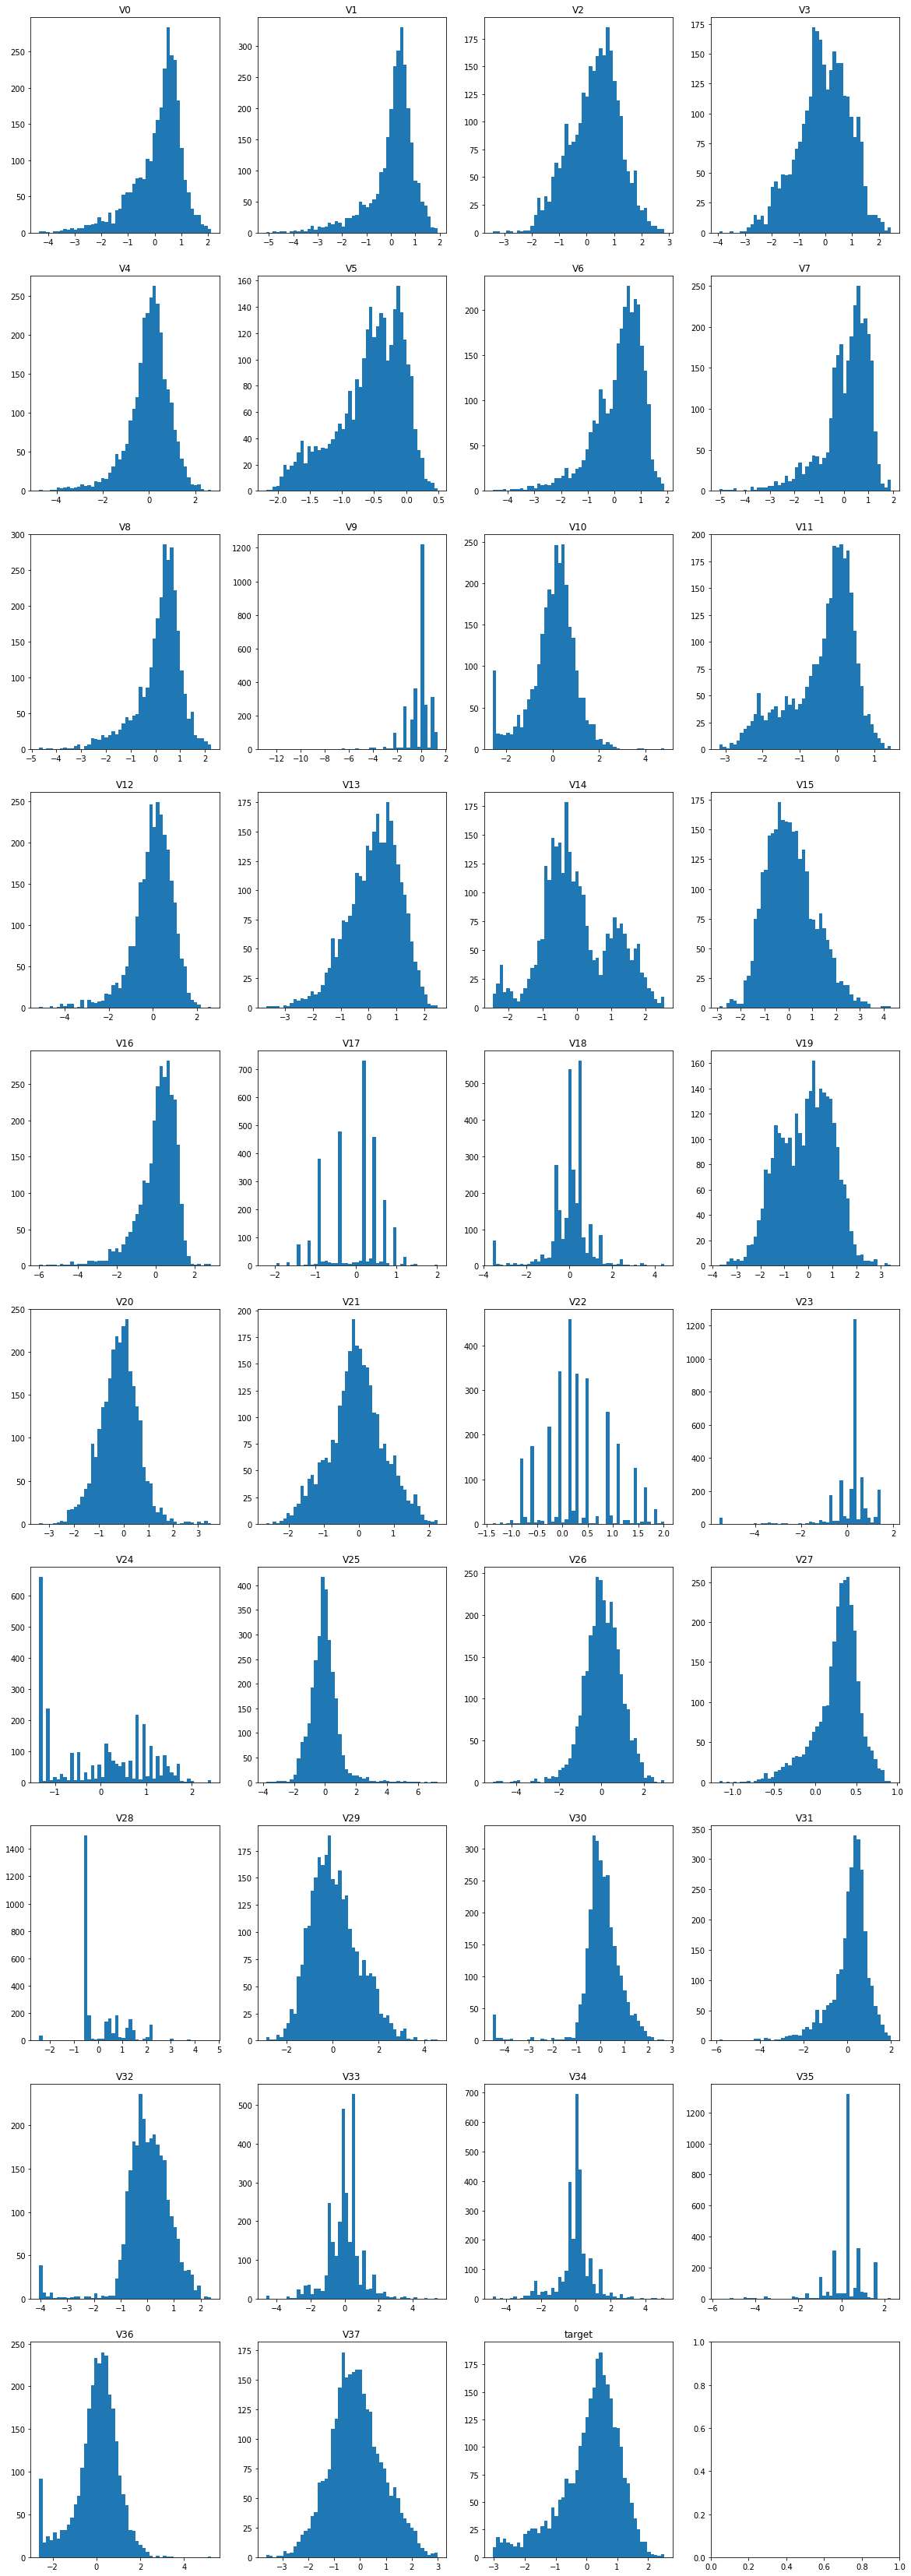

In [8]:
fig, ax = plt.subplots(10, 4, figsize = (20, 60))
cols = list(data_train.columns)
for i in range(10):
    for j in range(4):
        if (4 * i + j + 1) > len(cols):
            break  #break退出内部循环
        ax[i, j].hist(data_train[cols[4 * i + j]], bins = 50)
        ax[i, j].set_title(cols[4 * i + j])

In [9]:
stats.mstats.skew(data_train['V36'].values)

masked_array(data=-0.5928292,
             mask=False,
       fill_value=1e+20)

In [10]:
#制作训练集
feature = [x for x in data_train.columns if x not in ['target']]
X_train = data_train[feature]
y_train = data_train['target']

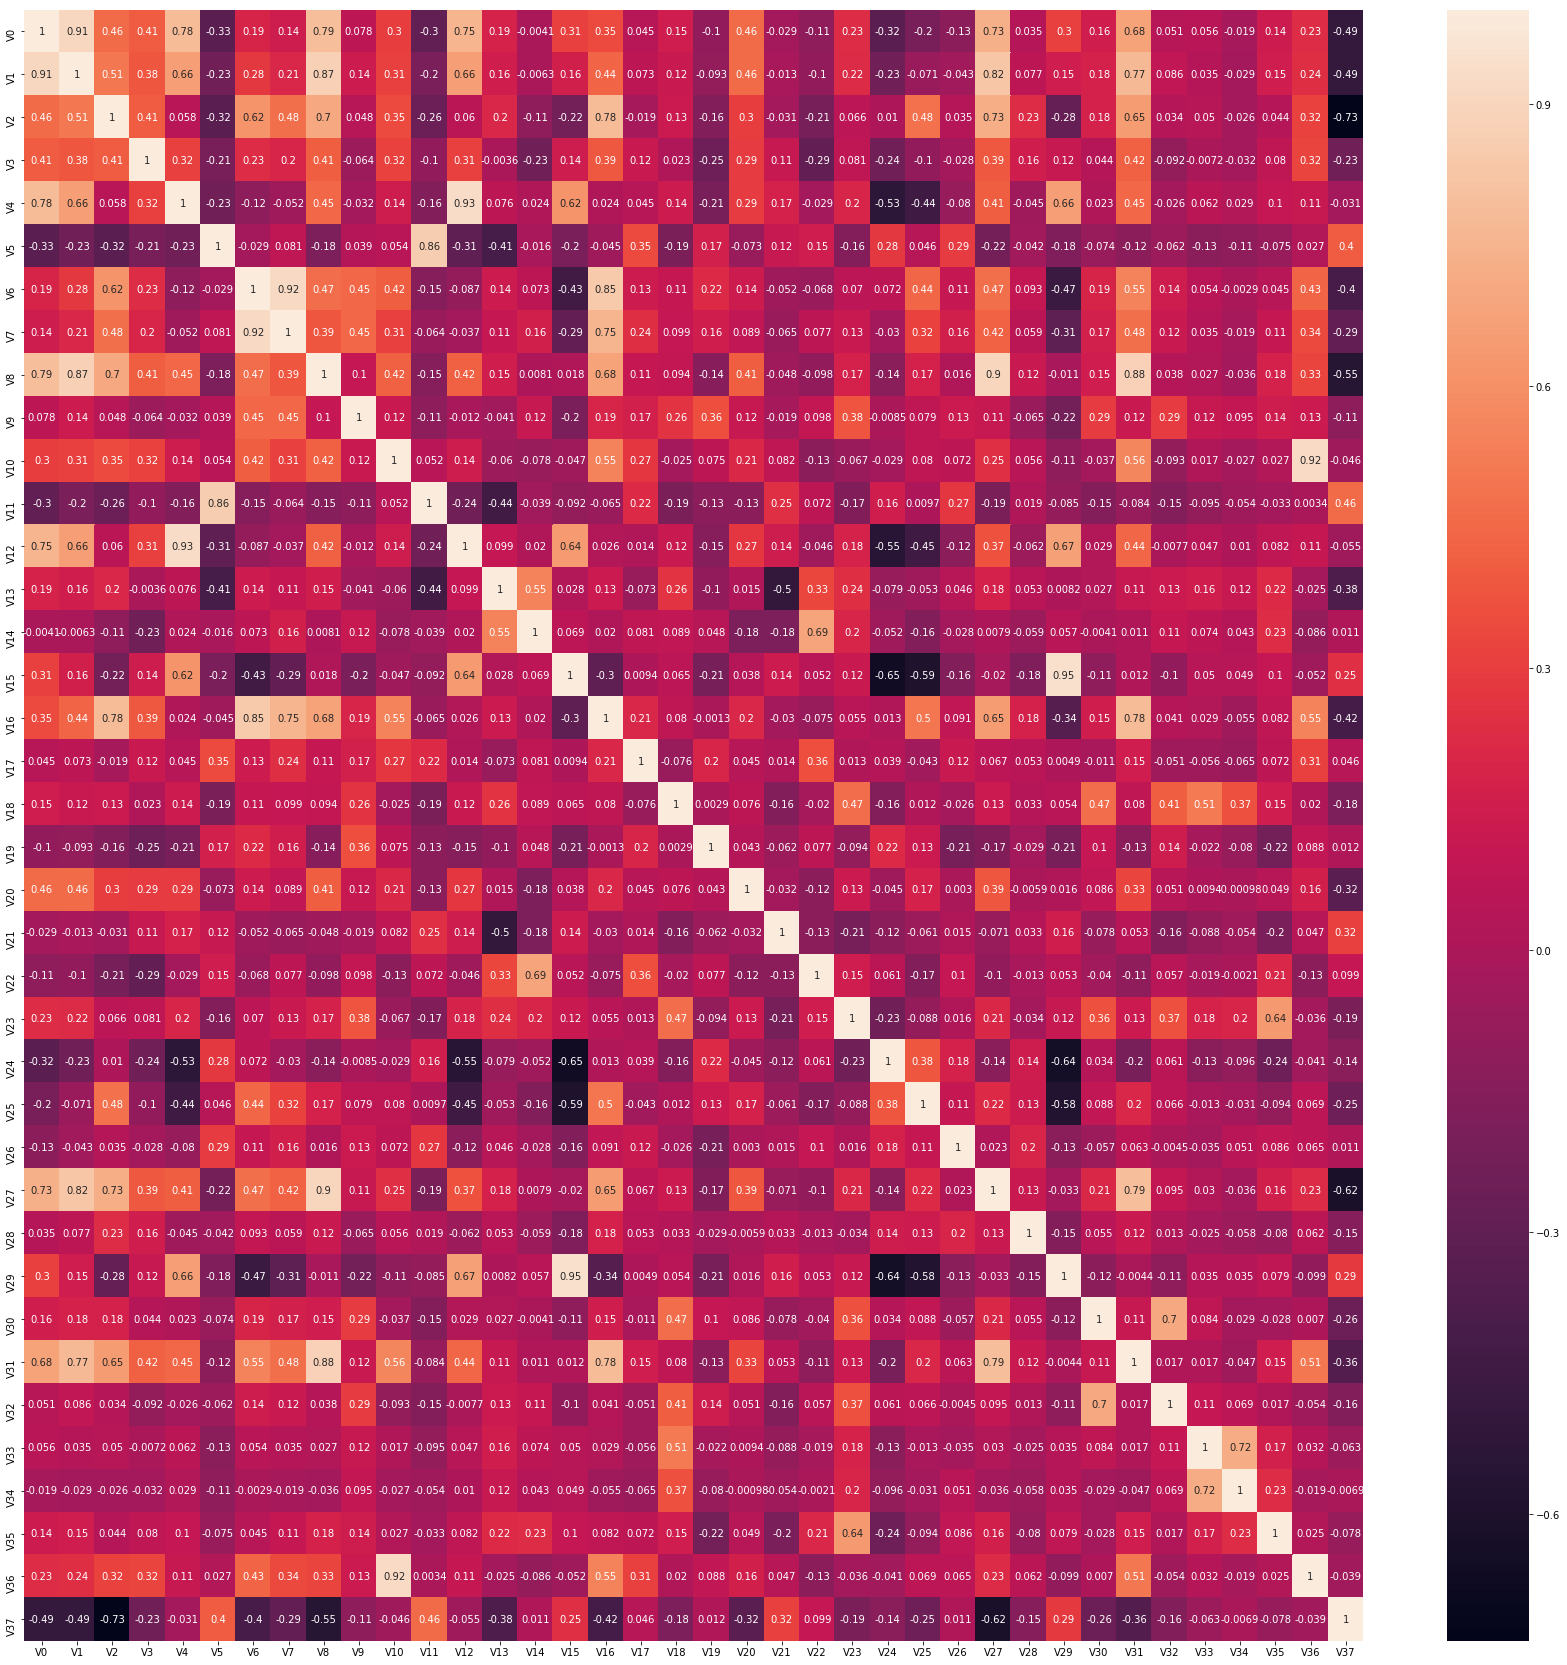

In [11]:
fig = plt.figure(figsize = (30, 30))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot = True)

In [12]:
xg_train = xgb.DMatrix(X_train, y_train)

In [13]:
xgb_params = {
    'seed' : 0,  
    'eta' : 0.1,
    'colsample_bytree' : 0.5,    
    'subsample' : 0.5,
    #从reg:linear改为reg:squarederror对结果影响并不大，前者并不适用这个数据集
    'objective' : 'reg:squarederror',
    'max_depth' : 5, 
    'min_child_weight' : 3
}

In [14]:
def eval_mse(y_hat, xg_train): #第二个参数要和自定义的转换数据集名称一致（下方xg_train），第一个参数随意
    y_true = xg_train.get_label()
    return 'mse', mean_squared_error(y_true, y_hat)

In [32]:
bst_cv1 = xgb.cv(params = xgb_params, dtrain = xg_train, num_boost_round = 150, nfold = 3, seed = 0, 
                 feval = eval_mse, #feval引入打分函数
                 maximize = False, early_stopping_rounds = 10)


In [33]:
bst_cv1

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std,train-mse-mean,train-mse-std,test-mse-mean,test-mse-std
0,0.966125,0.008418,0.969089,0.015864,0.933469,0.016297,0.939385,0.030602
1,0.889683,0.006661,0.894474,0.017187,0.791580,0.011880,0.800380,0.030658
2,0.820401,0.006786,0.827086,0.015311,0.673105,0.011163,0.684307,0.025276
3,0.757524,0.005417,0.767443,0.015662,0.573873,0.008221,0.589213,0.023945
4,0.702853,0.005305,0.714694,0.015600,0.494030,0.007445,0.511031,0.022201
5,0.653452,0.004640,0.669128,0.015750,0.427021,0.006051,0.447980,0.021014
6,0.609485,0.003942,0.627897,0.014947,0.371487,0.004795,0.394478,0.018716
7,0.572211,0.002396,0.593450,0.014485,0.327432,0.002741,0.352393,0.017212
8,0.537070,0.002183,0.562215,0.013453,0.288449,0.002344,0.316267,0.015149
9,0.504952,0.003084,0.534108,0.011171,0.254986,0.003112,0.285397,0.011963


In [16]:
print('CV score:', bst_cv1.iloc[-1, :]['test-mse-mean'])

CV score: 0.126103


In [17]:
xgb_param_grid = {'max_depth' : list(range(3, 5)), 'min_child_weight' : list((9, 10, 11))}

In [18]:
def sk_eval_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

In [19]:
#sklearn的make_score方法，用于制造scoring参数的值，可生成除备选字符串之外的自定义方法
mse_scorer = make_scorer(sk_eval_mse, greater_is_better = False)

In [20]:
class XGBoostRegressor(object): #object类似继承了object类的意思
    #参数'**kwargs'中的'**'是以字典形式传入的意思
    def __init__(self, **kwargs):
        self.params = kwargs
        if 'num_boost_round' in self.params:
            self.num_boost_round = self.params['num_boost_round']
            self.params.pop('num_boost_round')
        else:
            self.num_boost_round = 50
            
        self.params.update({'objective' : 'reg:squarederror', 'seed' : 0})
        
    def fit(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, y_train)
        self.bst = xgb.train(params = self.params, dtrain = dtrain, num_boost_round = self.num_boost_round, feval = eval_mse, maximize = False)
    
    def predict(self, x_pred):
        dpred = xgb.DMatrix(x_pred)
        return self.bst.predict(dpred)
   
    def get_params(self, deep = True):
        return self.params
    
    def set_params(self, **params):
        self.params.update(params)
        return self

In [21]:
grid = GridSearchCV(XGBoostRegressor(eta = 0.1,
                                     num_boost_round = 100,
                                     colsample_bytree = 0.5,
                                     subsample = 0.5),
                    param_grid = xgb_param_grid,
                    cv = 5,
                    scoring = mse_scorer)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<__main__.XGBoostRegressor object at 0x000001D64FDD9A90>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4], 'min_child_weight': [9, 10, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(sk_eval_mse, greater_is_better=False),
       verbose=0)

In [22]:
grid.best_params_, grid.best_score_

({'max_depth': 4, 'min_child_weight': 10}, -0.13706235243290496)

In [23]:
xgb_param_grid = {'eta' : [0.5, 0.4, 0.3, 0.2, 0.1, 0.075, 0.05, 0.04, 0.03]}

In [24]:
grid = GridSearchCV(XGBoostRegressor(num_boost_round = 100,
                                     max_depth = 4,
                                     min_child_weight = 10,
                                     gamma = 0.3,
                                     colsample_bytree = 0.8,
                                     subsample = 0.8), 
                   param_grid = xgb_param_grid,
                   cv = 5,
                   scoring = mse_scorer)

In [25]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<__main__.XGBoostRegressor object at 0x000001D64BCD1550>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'eta': [0.5, 0.4, 0.3, 0.2, 0.1, 0.075, 0.05, 0.04, 0.03]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(sk_eval_mse, greater_is_better=False),
       verbose=0)

In [26]:
grid.best_params_, grid.best_score_

({'eta': 0.1}, -0.13652280491934898)

In [48]:
xgb_params_final = {
    'seed' : 0,  
    'eta' : 0.1,
    'colsample_bytree' : 0.8,    
    'subsample' : 0.8,
    #从reg:linear改为reg:squarederror对结果影响并不大，前者并不适用这个数据集
    'objective' : 'reg:squarederror',
    'max_depth' : 4, 
    'min_child_weight' : 3
}

In [49]:
bst = xgb.train(params = xgb_params, dtrain = xg_train, num_boost_round = 100, feval = eval_mse, maximize = False)

In [50]:
y_pred = bst.predict(xgb.DMatrix(data_test))

In [51]:
pd.Series(y_pred).to_excel('D:/python/practise/sample/zhengqi/result/result_01.xlsx')

<font color="red">SCORE : 0.1513</font>